In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [15]:
df=pd.read_csv("C:\\Users\\Harmeet Singh\\OneDrive\\Desktop\\student pass or  fail knn.csv")

In [16]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,traveltime,studytime,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,pass
0,1,1,18,1,0,0,4,4,2,2,...,3,4,1,1,3,6,5,6,6,0
1,1,1,17,1,0,1,1,1,1,2,...,3,3,1,1,3,4,5,5,6,0
2,1,1,15,1,1,1,1,1,1,2,...,3,2,2,3,3,10,7,8,10,1
3,1,1,15,1,0,1,4,2,1,3,...,2,2,1,1,5,2,15,14,15,1
4,1,1,16,1,0,1,3,3,1,2,...,3,2,1,2,5,4,6,10,10,1


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   school      395 non-null    int64
 1   sex         395 non-null    int64
 2   age         395 non-null    int64
 3   address     395 non-null    int64
 4   famsize     395 non-null    int64
 5   Pstatus     395 non-null    int64
 6   Medu        395 non-null    int64
 7   Fedu        395 non-null    int64
 8   traveltime  395 non-null    int64
 9   studytime   395 non-null    int64
 10  failures    395 non-null    int64
 11  schoolsup   395 non-null    int64
 12  famsup      395 non-null    int64
 13  paid        395 non-null    int64
 14  activities  395 non-null    int64
 15  nursery     395 non-null    int64
 16  higher      395 non-null    int64
 17  internet    395 non-null    int64
 18  romantic    395 non-null    int64
 19  famrel      395 non-null    int64
 20  freetime    395 non-null    int6

In [18]:
df = df[['sex','age','Pstatus','traveltime','studytime','health','pass','internet']]

In [19]:
df.describe()

,sex,age,Pstatus,traveltime,studytime,health,pass,internet
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,0.526582,16.696203,0.896203,1.448101,2.035443,3.554430,0.670886,0.832911
std,0.499926,1.276043,0.305384,0.697505,0.839240,1.390303,0.470487,0.373528
min,0.000000,15.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,0.000000,16.000000,1.000000,1.000000,1.000000,3.000000,0.000000,1.000000
50%,1.000000,17.000000,1.000000,1.000000,2.000000,4.000000,1.000000,1.000000
75%,1.000000,18.000000,1.000000,2.000000,2.000000,5.000000,1.000000,1.000000
max,1.000000,22.000000,1.000000,4.000000,4.000000,5.000000,1.000000,1.000000


<AxesSubplot:>

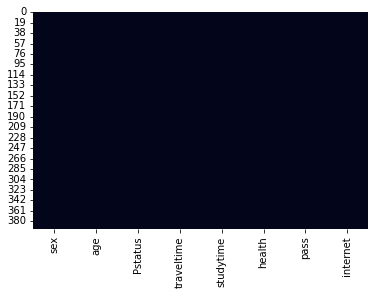

In [20]:
sns.heatmap(df.isnull(),cbar=False)

In [31]:
from sklearn.preprocessing import StandardScaler
sm=StandardScaler()

In [32]:
sm.fit(df.drop('pass',axis=1))

StandardScaler()

In [50]:
transformed=sm.transform(df.drop('pass',axis=1))

In [51]:
transformed

array([[ 0.94817639,  1.02304645, -2.9383918 , ..., -0.04228585,
        -0.39928949, -2.23267743],
       [ 0.94817639,  0.23837976,  0.34032221, ..., -0.04228585,
        -0.39928949,  0.44789274],
       [ 0.94817639, -1.33095364,  0.34032221, ..., -0.04228585,
        -0.39928949,  0.44789274],
       ...,
       [-1.05465609,  3.37704655,  0.34032221, ..., -1.23535078,
        -0.39928949, -2.23267743],
       [-1.05465609,  1.02304645,  0.34032221, ..., -1.23535078,
         1.04106985,  0.44789274],
       [-1.05465609,  1.80771315,  0.34032221, ..., -1.23535078,
         1.04106985,  0.44789274]])

In [36]:
from sklearn.model_selection import train_test_split

In [78]:
x_train,x_test,y_train,y_test=train_test_split(transformed,df['pass'],test_size=0.4,random_state=42)

In [79]:
from sklearn.neighbors import KNeighborsClassifier

In [80]:
knn=KNeighborsClassifier(n_neighbors=1)

In [81]:
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [82]:
predicted=knn.predict(x_test)
predicted

array([0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0], dtype=int64)

In [83]:

from sklearn.metrics import confusion_matrix,classification_report

In [84]:
confusion_matrix(y_test,predicted)

array([[16, 40],
       [29, 73]], dtype=int64)

In [85]:
print(classification_report(y_test,predicted))

              precision    recall  f1-score   support

           0       0.36      0.29      0.32        56
           1       0.65      0.72      0.68       102

    accuracy                           0.56       158
   macro avg       0.50      0.50      0.50       158
weighted avg       0.54      0.56      0.55       158



In [88]:
error_val=[]
for i in range(1,40):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    predicted2=knn.predict(x_test)
    error_val.append(np.mean(predicted2 != y_test))

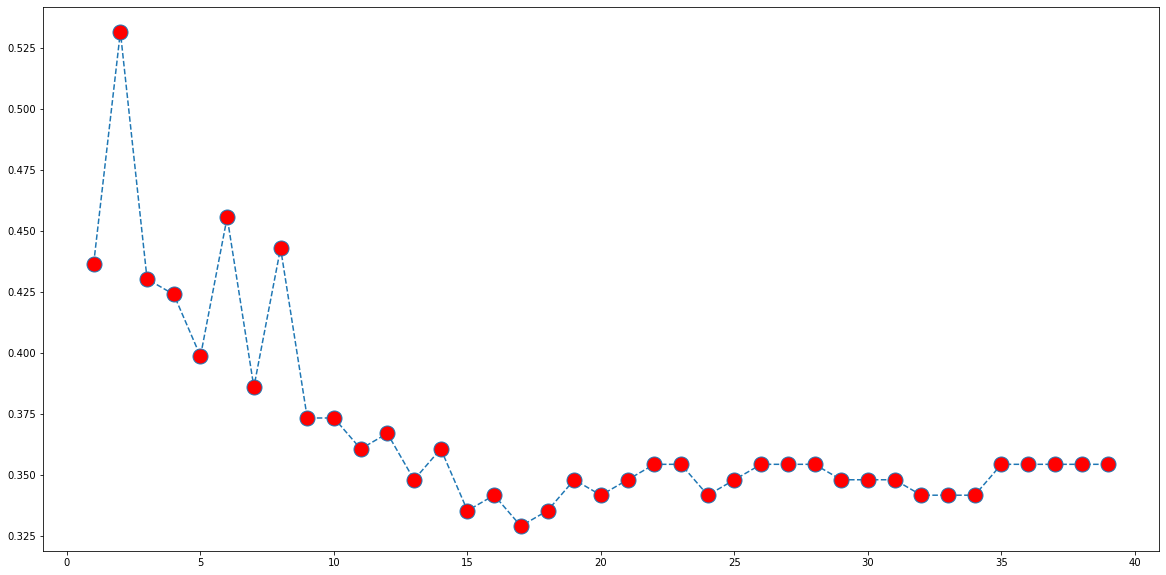

In [91]:
plt.figure(figsize=(20,10))
plt.plot(range(1,40),error_val,marker='o',markersize=15,markerfacecolor='red',linestyle='--')

In [95]:
knn=KNeighborsClassifier(n_neighbors=17)
knn.fit(x_train,y_train)
predicted3=knn.predict(x_test)

In [96]:
confusion_matrix(y_test,predicted3)

array([[  5,  51],
       [  1, 101]], dtype=int64)

In [98]:
print(classification_report(y_test,predicted3))

              precision    recall  f1-score   support

           0       0.83      0.09      0.16        56
           1       0.66      0.99      0.80       102

    accuracy                           0.67       158
   macro avg       0.75      0.54      0.48       158
weighted avg       0.72      0.67      0.57       158

